##Downloading The Dataset

In [1]:
!gdown --id 1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV

Downloading...
From: https://drive.google.com/uc?id=1VNpyNkGxHdskfdTNRSjjyNa5qC9u0JyV
To: /content/Fraud.csv
494MB [00:10, 45.6MB/s]


##Importing Libraries

In [385]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#suppressing the warnings
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

##Loading The Data

In [69]:
dataset = pd.read_csv('/content/Fraud.csv')

##Blancing The Dataset With Respect To Target Variable

In [70]:
fraud = dataset[dataset['isFraud']==1]

In [71]:
fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0,C1305486145,181.0,0.0,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.0,C840083671,181.0,0.0,C38997010,21182.0,0.0,1,0
251,1,TRANSFER,2806.0,C1420196421,2806.0,0.0,C972765878,0.0,0.0,1,0
252,1,CASH_OUT,2806.0,C2101527076,2806.0,0.0,C1007251739,26202.0,0.0,1,0
680,1,TRANSFER,20128.0,C137533655,20128.0,0.0,C1848415041,0.0,0.0,1,0


In [72]:
print('Dataset shape:')
fraud.shape

Dataset shape:


(8213, 11)

In [73]:
not_fraud = dataset[dataset['isFraud']==0]
not_fraud = not_fraud[:8213]
not_fraud.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [74]:
print('Dataset shape:')
not_fraud.shape

Dataset shape:


(8213, 11)

In [75]:
dataset = pd.concat([not_fraud, fraud], axis=0)
dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0,0


In [76]:
dataset.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [77]:
print('Dataset shape:')
dataset.shape

Dataset shape:


(16426, 11)

##Data Preprocessing

In [78]:
dataset = dataset.sample(frac=1).reset_index(drop=True)
dataset = dataset.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1)
dataset.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,127,TRANSFER,829012.31,829012.31,0.00,0.00,0.00,1
1,58,CASH_OUT,3156421.43,3156421.43,0.00,181440.45,3337861.88,1
2,388,TRANSFER,680224.41,680224.41,0.00,0.00,0.00,1
3,394,CASH_OUT,3354215.55,3354215.55,0.00,0.00,3354215.55,1
4,161,TRANSFER,10000000.00,11336901.11,1336901.11,0.00,0.00,1


In [79]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
type_n = label_encoder.fit_transform(dataset['type'])
type_n = pd.DataFrame({'type_n': type_n})
transactions = pd.concat([type_n, dataset['type']], axis=1)
transactions.head()

,type_n,type
0,4,TRANSFER
1,1,CASH_OUT
2,4,TRANSFER
3,1,CASH_OUT
4,4,TRANSFER


##Converting Categorical Into Numerical

In [80]:
pos = pd.get_dummies(dataset['type'], drop_first = True)
pos.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1
1,1,0,0,0
2,0,0,0,1
3,1,0,0,0
4,0,0,0,1


In [81]:
dataset = pd.concat([pos, dataset], axis=1)

dataset = dataset.drop(['type'], axis=1)
dataset.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,0,0,1,127,829012.31,829012.31,0.00,0.00,0.00,1
1,1,0,0,0,58,3156421.43,3156421.43,0.00,181440.45,3337861.88,1
2,0,0,0,1,388,680224.41,680224.41,0.00,0.00,0.00,1
3,1,0,0,0,394,3354215.55,3354215.55,0.00,0.00,3354215.55,1
4,0,0,0,1,161,10000000.00,11336901.11,1336901.11,0.00,0.00,1


##Multi Collinearity

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif)

In [83]:
X = dataset.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,CASH_OUT,2.101656
1,DEBIT,1.000759
2,PAYMENT,1.000543
3,TRANSFER,2.050014
4,step,2.767693
5,amount,68.080215
6,oldbalanceOrg,170.448033
7,newbalanceOrig,75.383791
8,oldbalanceDest,9.323303
9,newbalanceDest,10.888236


In [84]:
dataset = dataset.drop(['step', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'], axis=1)
dataset.head()

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,isFraud
0,0,0,0,1,829012.31,1
1,1,0,0,0,3156421.43,1
2,0,0,0,1,680224.41,1
3,1,0,0,0,3354215.55,1
4,0,0,0,1,10000000.00,1


##Getting Insights Of Data

In [85]:
print('Shape of dataset:')
dataset.shape

Shape of dataset:


(16426, 6)

In [86]:
print('Shape of info:')
dataset.info()

Shape of info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16426 entries, 0 to 16425
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASH_OUT  16426 non-null  uint8  
 1   DEBIT     16426 non-null  uint8  
 2   PAYMENT   16426 non-null  uint8  
 3   TRANSFER  16426 non-null  uint8  
 4   amount    16426 non-null  float64
 5   isFraud   16426 non-null  int64  
dtypes: float64(1), int64(1), uint8(4)
memory usage: 320.9 KB


In [87]:
print('Checking for null values:')
dataset.isnull().sum()

Checking for null values:


CASH_OUT    0
DEBIT       0
PAYMENT     0
TRANSFER    0
amount      0
isFraud     0
dtype: int64

##Removing Duplicates

In [88]:
print('Duplicates Rows:')
dataset[dataset.duplicated()==True]

Duplicates Rows:


,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,isFraud
10,0,0,0,1,10000000.0,1
144,1,0,0,0,10000000.0,1
232,0,0,0,1,10000000.0,1
260,1,0,0,0,10000000.0,1
312,0,0,0,1,10000000.0,1
...,...,...,...,...,...,...
16015,1,0,0,0,10000000.0,1
16049,0,0,0,1,10000000.0,1
16071,1,0,0,0,10000000.0,1
16114,0,0,0,1,10000000.0,1


In [89]:
dataset.drop_duplicates(inplace=True)
dataset[dataset.duplicated()==True]

,CASH_OUT,DEBIT,PAYMENT,TRANSFER,amount,isFraud


In [90]:
print('Shape of dataset:')
dataset.shape

Shape of dataset:


(16116, 6)

##Data Visualization

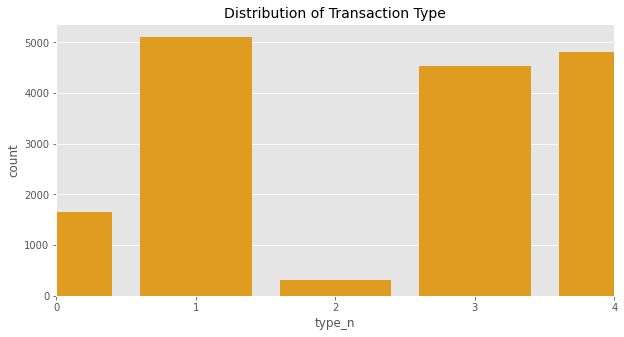

In [91]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
trans = transactions['type_n']
sns.countplot(trans, ax=ax, color='orange')
ax.set_title('Distribution of Transaction Type', fontsize=14)
ax.set_xlim([min(trans), max(trans)])
plt.show()

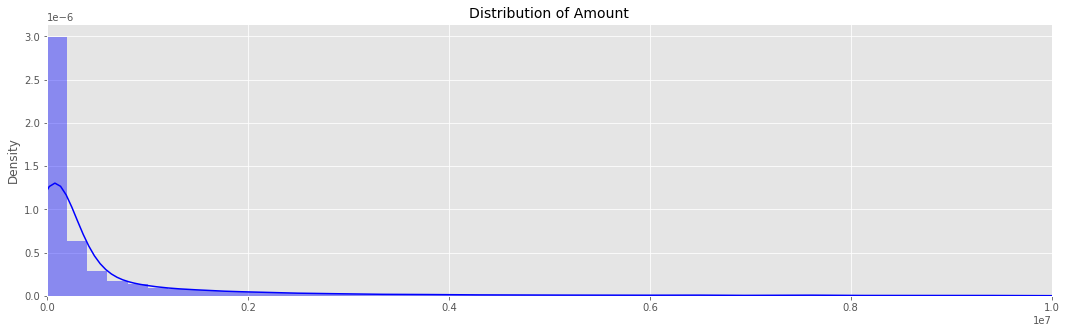

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(18,5))
amount = dataset['amount'].values
sns.distplot(amount, ax=ax, color='blue')
ax.set_title('Distribution of Amount', fontsize=14)
ax.set_xlim([min(amount), max(amount)])
plt.show()

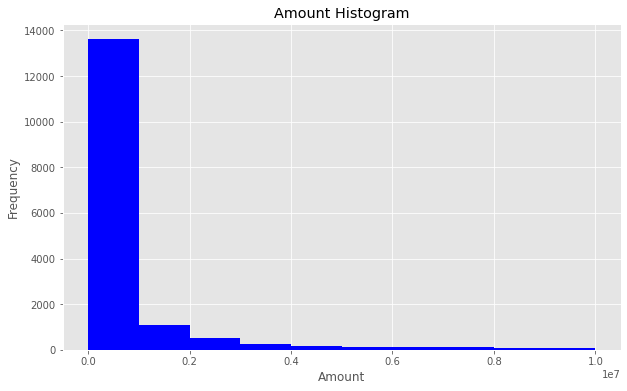

In [94]:
dataset.amount.plot(kind="hist",bins=10,figsize=(10,6),color="b",grid="True")
plt.xlabel("Amount")
plt.title("Amount Histogram")
plt.show()

##Target Class Distribution Visualization

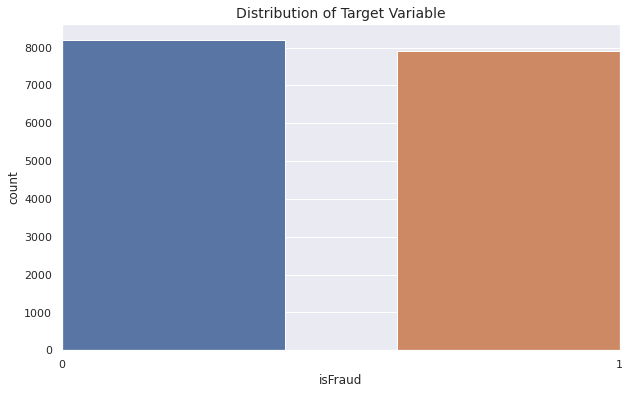

In [95]:
sns.set(style='darkgrid')

fig, ax = plt.subplots(1, 1, figsize=(10,6))
fraud = dataset['isFraud']
sns.countplot(fraud, ax=ax)
ax.set_title('Distribution of Target Variable', fontsize=14)
ax.set_xlim([min(fraud), max(fraud)])
plt.show()

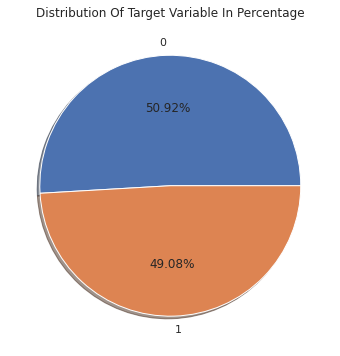

In [96]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
dataset['isFraud'].value_counts().plot.pie(autopct='%1.2f%%', shadow=True)
plt.title('Distribution Of Target Variable In Percentage')
plt.ylabel("")
plt.show()

##Spliting The Data Into Train & Test Portion

In [97]:
Y = dataset['isFraud']
X = dataset.drop(['isFraud'], axis=1)

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [99]:
print('Train Size')
print(f'Predictor Variable Size: {X_train.shape}')
print(f'Target Variable Size: {Y_train.shape}')

Train Size
Predictor Variable Size: (12892, 5)
Target Variable Size: (12892,)


In [100]:
print('Test Size')
print(f'Predictor Variable Size: {X_test.shape}')
print(f'Target Variable Size: {Y_test.shape}')

Test Size
Predictor Variable Size: (3224, 5)
Target Variable Size: (3224,)


In [353]:
method_names = []
method_scores = []

##Random Forest Classifier

In [354]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100,random_state=1)
rf.fit(X_train, Y_train)
rf_accuracy =  rf.score(X_test, Y_test)

print(f"Random Forest Classifier Test Accuracy {rf_accuracy*100:2f}")

method_names.append('RandomForestClassifier')
method_scores.append(rf_accuracy*100)

Random Forest Classifier Test Accuracy 84.150124


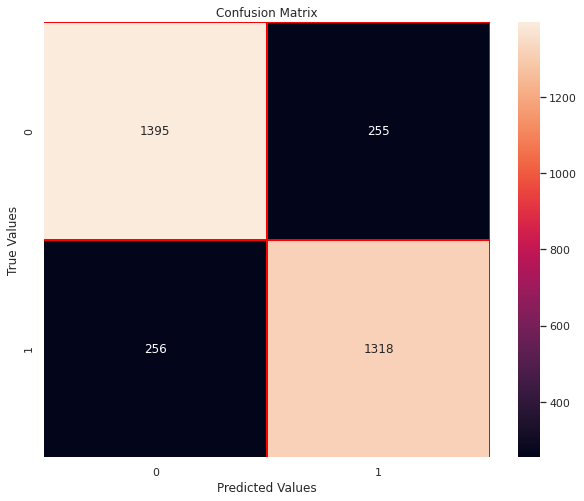

In [237]:
Y_pred = rf.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Decision Tree Classifier

In [355]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
dt_accuracy =  dt.score(X_test, Y_test)

print(f"Decision Tree Classifier Test Accuracy {dt_accuracy*100:2f}")

method_names.append('DecisionTreeClassifier')
method_scores.append(dt_accuracy*100)

Decision Tree Classifier Test Accuracy 84.150124


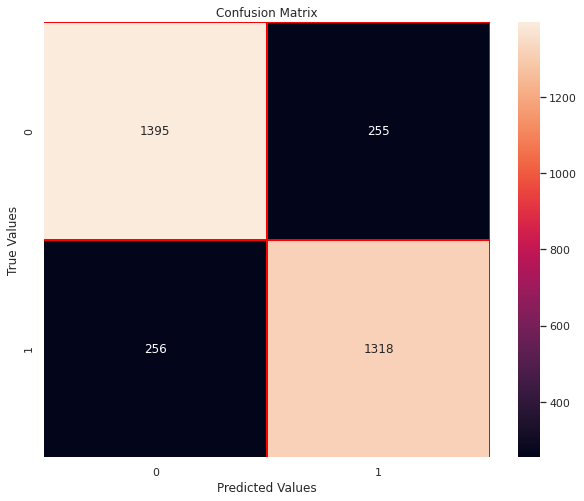

In [239]:
Y_pred = dt.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Extra Tree Classifier

In [240]:
from sklearn.tree import ExtraTreeClassifier

etc = ExtraTreeClassifier()
etc.fit(X_train, Y_train)
etc_accuracy =  etc.score(X_test, Y_test)

print(f"Extra Tree Classifier Test Accuracy {etc_accuracy*100:2f}")

Extra Tree Classifier Test Accuracy 84.119107


In [356]:
method_names.append("ExtraTreeClassifier")
method_scores.append(etc_accuracy*100)

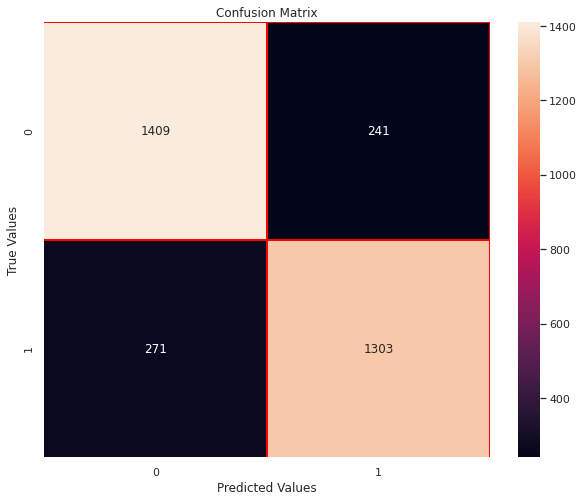

In [242]:
Y_pred = etc.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Support Vector Machine

In [357]:
from sklearn.svm import SVC
svm = SVC(random_state=42)
svm.fit(X_train, Y_train)
svm_accuracy =  svm.score(X_test, Y_test)

print(f"SVM Test Accuracy {svm_accuracy*100:2f}")

method_names.append("SVM")
method_scores.append(svm_accuracy*100)

SVM Test Accuracy 76.519851


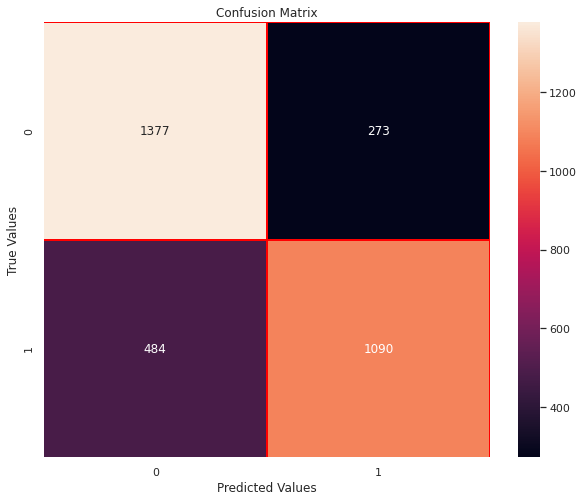

In [244]:
Y_pred = svm.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Nu-Support Vector Classification

In [245]:
from sklearn.svm import NuSVC

nusvc = NuSVC(gamma='scale', probability=True, random_state=0)
nusvc.fit(X_train, Y_train)
nusvc_accuracy =  nusvc.score(X_test, Y_test)

print(f"Nu-Support Vector Test Accuracy {nusvc_accuracy*100:2f}")

Nu-Support Vector Test Accuracy 77.574442


In [358]:
method_names.append("Nu-SupportVector")
method_scores.append(nusvc_accuracy*100)

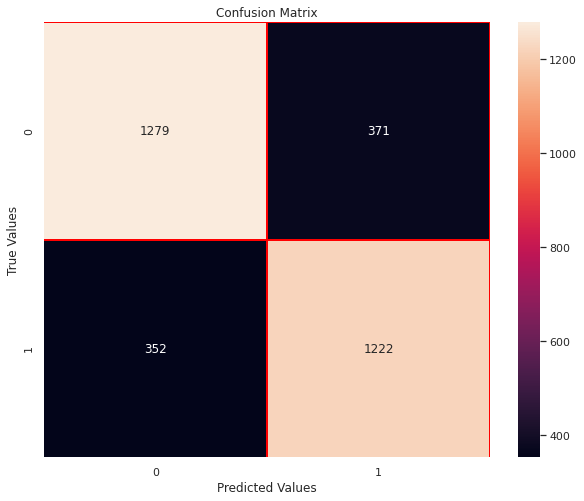

In [247]:
Y_pred = nusvc.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Linear SVC

In [253]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC()
lsvc.fit(X_train, Y_train)
lsvc_accuracy =  lsvc.score(X_test, Y_test)

print(f"Linear Support Vector Test Accuracy {lsvc_accuracy*100:2f}")

Linear Support Vector Test Accuracy 90.043424


In [359]:
method_names.append("LinearSVC")
method_scores.append(lsvc_accuracy*100)

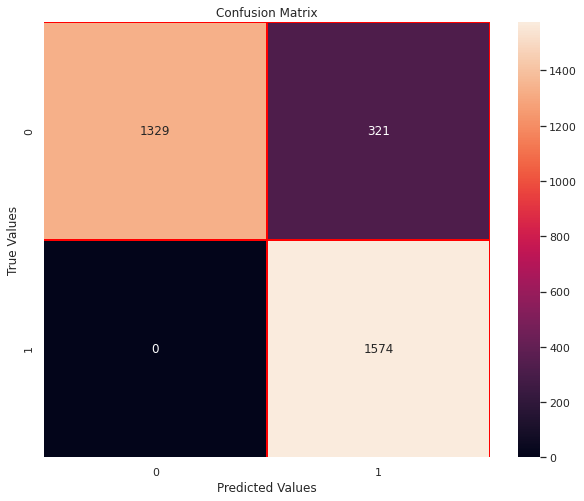

In [255]:
Y_pred = lsvc.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Passive Aggressive Classifier

In [274]:
from sklearn.linear_model import PassiveAggressiveClassifier

pac = PassiveAggressiveClassifier()
pac.fit(X_train, Y_train)
pac_accuracy =  pac.score(X_test, Y_test)

print(f"Passive Aggressive Classifier Test Accuracy {pac_accuracy*100:2f}")

Passive Aggressive Classifier Test Accuracy 80.086849


In [360]:
method_names.append("PassiveAggressiveClassifier")
method_scores.append(pac_accuracy*100)

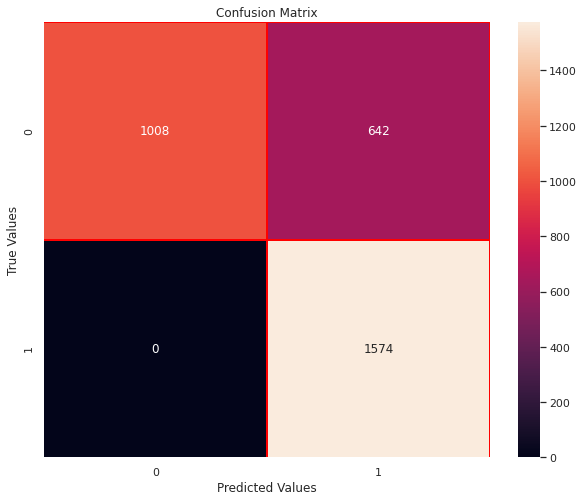

In [281]:
Y_pred = pac.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##BernoulliNB

In [282]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train, Y_train)
bnb_accuracy =  bnb.score(X_test, Y_test)

print(f"BernoulliNB Test Accuracy {bnb_accuracy*100:2f}")

BernoulliNB Test Accuracy 90.043424


In [361]:
method_names.append("BernoulliNB")
method_scores.append(bnb_accuracy*100)

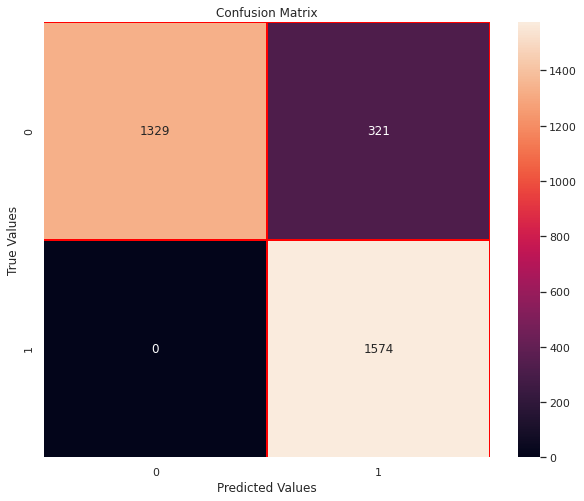

In [284]:
Y_pred = bnb.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [285]:
from sklearn.ensemble import AdaBoostClassifier

adc = AdaBoostClassifier()
adc.fit(X_train, Y_train)
adc_accuracy =  adc.score(X_test, Y_test)

print(f"Ada Boost Classifier Test Accuracy {adc_accuracy*100:2f}")

Ada Boost Classifier Test Accuracy 90.043424


In [362]:
method_names.append("AdaBoostClassifier")
method_scores.append(adc_accuracy*100)

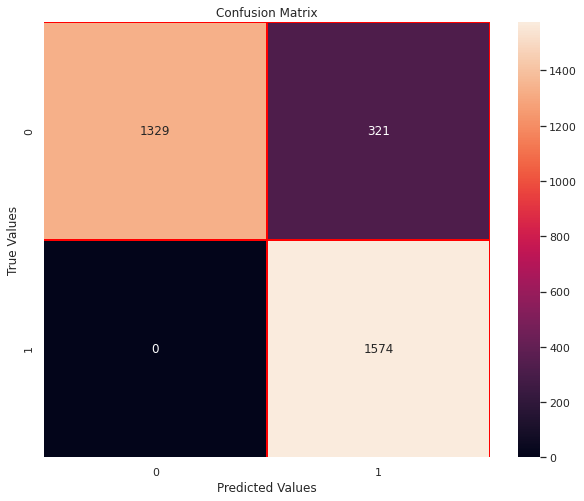

In [287]:
Y_pred = adc.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Gradient Boosting Classifier

In [288]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()
gbc.fit(X_train, Y_train)
gbc_accuracy =  gbc.score(X_test, Y_test)

print(f"Gradient Boosting Classifier Test Accuracy {gbc_accuracy*100:2f}")

Gradient Boosting Classifier Test Accuracy 90.074442


In [363]:
method_names.append("GradientBoostingClassifier")
method_scores.append(gbc_accuracy*100)

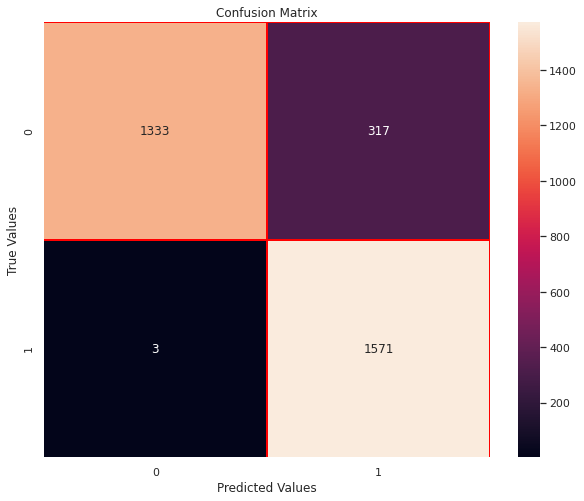

In [290]:
Y_pred = gbc.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Linear Discriminant Analysis

In [291]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, Y_train)
lda_accuracy =  lda.score(X_test, Y_test)

print(f"Linear Discriminant Analysis Test Accuracy {lda_accuracy*100:2f}")

Linear Discriminant Analysis Test Accuracy 90.043424


In [364]:
method_names.append("LinearDiscriminantAnalysis")
method_scores.append(lda_accuracy*100)

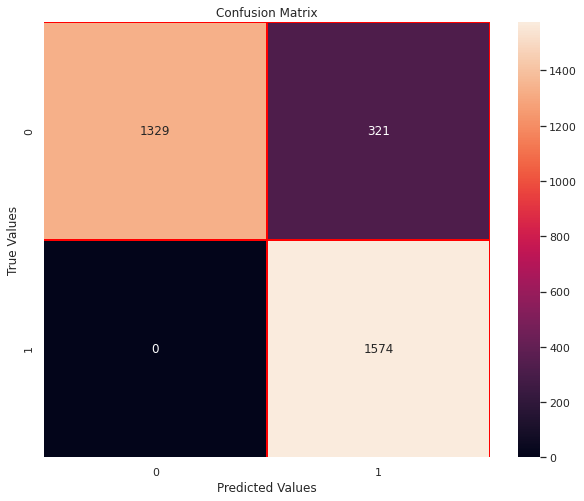

In [293]:
Y_pred = lda.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Bagging Classifier

In [297]:
from sklearn.ensemble import BaggingClassifier

bc = BaggingClassifier()
bc.fit(X_train, Y_train)
bc_accuracy =  bc.score(X_test, Y_test)

print(f"Bagging Classifier Test Accuracy {bc_accuracy*100:2f}")

Bagging Classifier Test Accuracy 84.026055


In [365]:
method_names.append("BaggingClassifier")
method_scores.append(bc_accuracy*100)

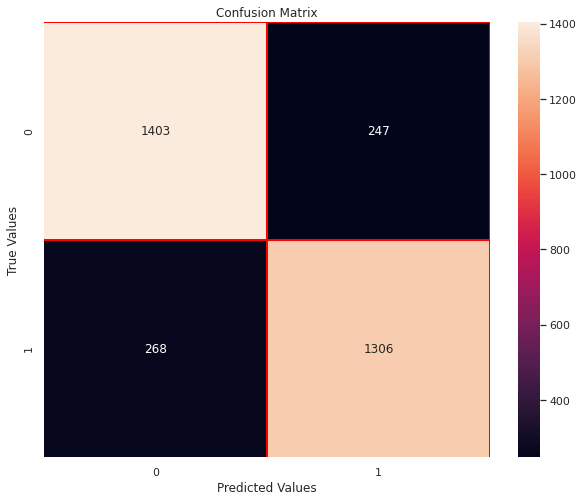

In [299]:
Y_pred = bc.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##K-Neighbors Classifier

In [305]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, Y_train)
knn_accuracy =  knn.score(X_test, Y_test)

print(f"KNN Test Accuracy {knn_accuracy*100:2f}")

KNN Test Accuracy 85.514888


In [370]:
method_names.append("KNN")
method_scores.append(knn_accuracy*100)

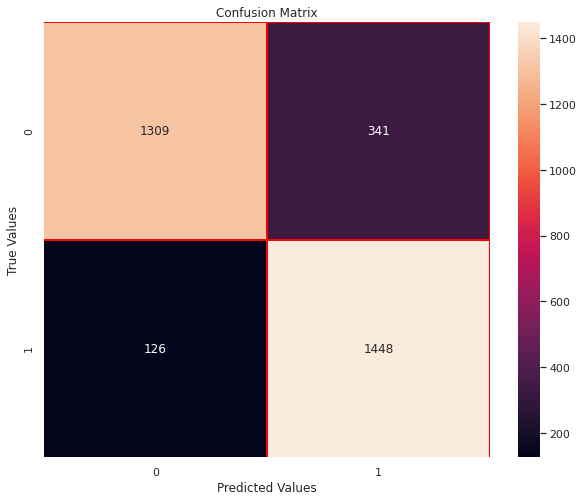

In [307]:
Y_pred = knn.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Naive Bayes

In [309]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)
nb_accuracy =  nb.score(X_test, Y_test)

print(f"Naive Bayes Classification Test Accuracy {nb_accuracy*100:2f}")

Naive Bayes Classification Test Accuracy 71.246898


In [371]:
method_names.append("NaiveBayesClassification")
method_scores.append(nb_accuracy*100)

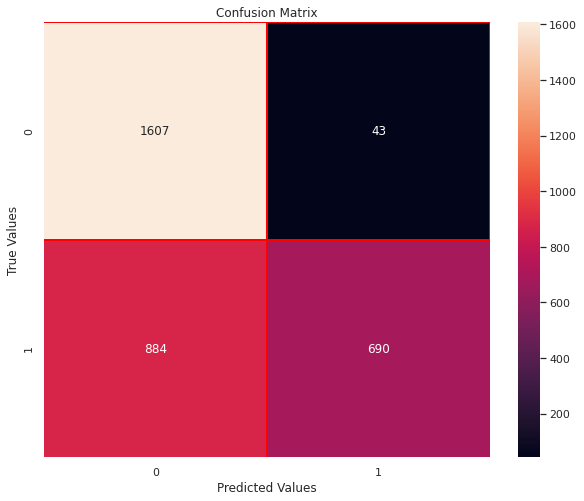

In [311]:
Y_pred = nb.predict(X_test)
conf_mat = confusion_matrix(Y_test,Y_pred)

f, ax = plt.subplots(figsize=(10,8))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

##Deep Learning

In [313]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import BatchNormalization

##Model Creation

In [327]:
model=Sequential()
model.add(Dense(200, input_dim=5, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(100, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())

model.add(Dense(1, activation="sigmoid"))

##Model Compiling & Training

In [328]:
model.compile(loss="binary_crossentropy", metrics=['accuracy'], optimizer='adam')
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 200)               1200      
_________________________________________________________________
batch_normalization_3 (Batch (None, 200)               800       
_________________________________________________________________
dense_17 (Dense)             (None, 100)               20100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)               400       
_________________________________________________________________
dense_18 (Dense)             (None, 64)                6464      
_________________________________________________________________
batch_normalization_5 (Batch (None, 64)                256       
_________________________________________________________________
dense_19 (Dense)             (None, 1)                

In [329]:
history=model.fit(X_train,Y_train, epochs=30)

Epoch 1/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4906 - accuracy: 0.7526
Epoch 2/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4826 - accuracy: 0.7535
Epoch 3/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4799 - accuracy: 0.7575
Epoch 4/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4843 - accuracy: 0.7564
Epoch 5/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4797 - accuracy: 0.7533
Epoch 6/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4760 - accuracy: 0.7559
Epoch 7/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4713 - accuracy: 0.7537
Epoch 8/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4785 - accuracy: 0.7522
Epoch 9/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4804 - accuracy: 0.7550
Epoch 10/30
403/403 [==============================] - 2s 4ms/step - loss: 0.4750 - accuracy: 0.7532

In [335]:
import math   
print(f'The traning accuracy of model is {math.floor(history.history["accuracy"][-1] * 100)} %')
print(f'The traning loss of model is {history.history["loss"][-1]:2f}')

The traning accuracy of model is 75 %
The traning loss of model is 0.482271


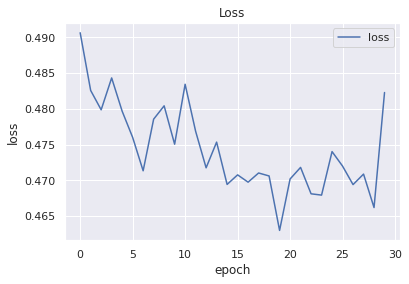

In [336]:
plt.title('Loss')
plt.plot(history.history['loss'], label='loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

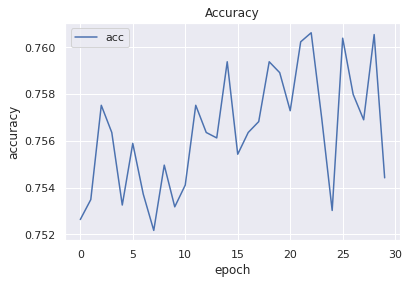

In [337]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

##Model Evaluation

In [338]:
result = model.evaluate(X_test,Y_test)

101/101 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.7618


In [372]:
method_names.append("DeepLearning")
method_scores.append(result[1]*100)

In [341]:
Y_pred = model.predict_classes(X_test)
cnf_matrix = confusion_matrix(Y_test, Y_pred)
classes = ['Not Fraud', 'Fraud']

In [342]:
!pip -q install mlxtend

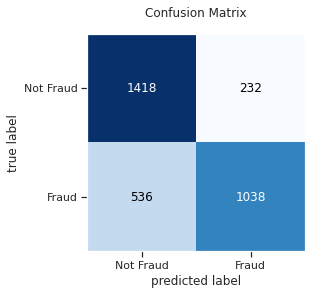

In [343]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(cnf_matrix)
ax.set_xticklabels([''] + list(classes))
ax.set_yticklabels([''] + list(classes))
plt.title('Confusion Matrix')
plt.show()
plt.show()

##Analyzing The Different Methodologies

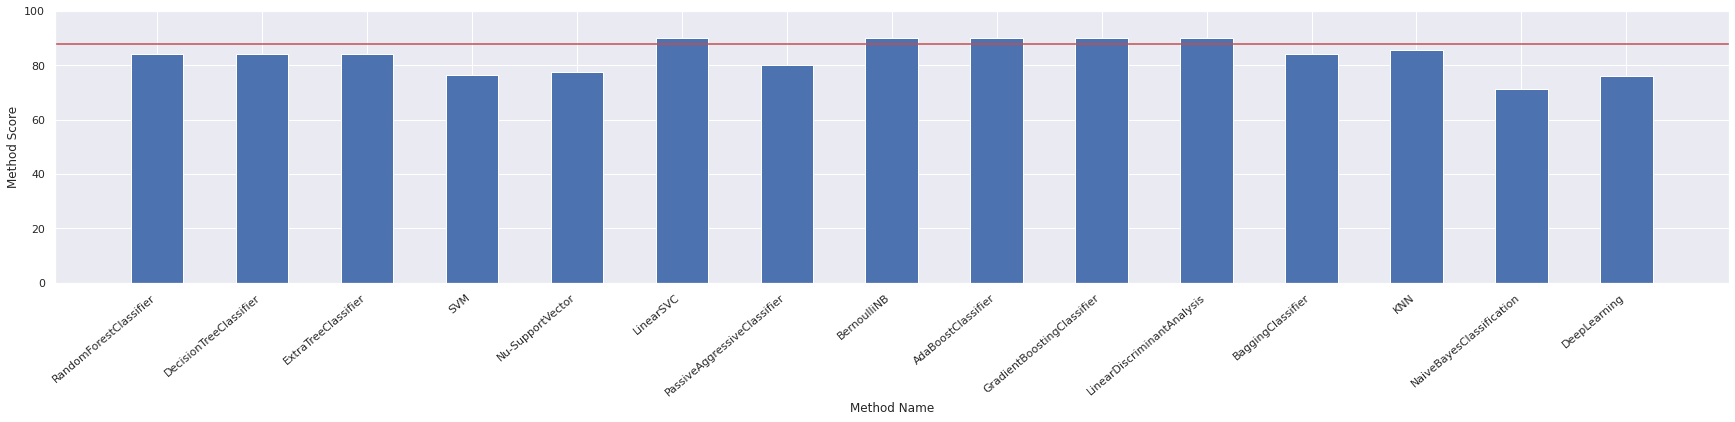

In [392]:
plt.figure(figsize=(30,5))
plt.ylim([0,100])
plt.bar(method_names, method_scores, width=0.5)
plt.xticks(rotation=40, ha='right')
plt.axhline(y = 88, color = 'r', linestyle = '-')
plt.xlabel('Method Name')
plt.ylabel('Method Score')
plt.show()

*Linear SVC, BernoulliNB, Ada Boost Classifier, Gradient Boost Classifier and Linear Discriminant Analysis algorithm has gain the highest accuracy.*



3) How did you select variables to be included in the model? <br>
For the section of independent variables that will take part in the training of the model I have used multi-collinearity as the metrics, where any column with multi-collinearity score greater than five will not included.



4) Demonstrate the performance of the model by using best set of tools. <br>
The performance of the model has tested using the testing data and looking at how well the model learn about test data and how well it applying its knowledge over never seen data. Confusion Matrix has also used to understand for which target class model is performing better or worse.

5) What are the key factors that predict fraudulent customer? <br>
Its the data about type of transcation and the amount get transcated.

6) Do these factors make sense? If yes, How? If not, How not? <br> Yes it makes sense any fraud transcation might have different transaction type or transcation amount than the users habitual one which might alarms the chance of categorizing it as fraud transaction.

7) What kind of prevention should be adopted while company update its infrastructure? <br> 
The dataset provided may or may not cover all kind of data points that points towards fraud transaction, also the dataset is quite small when both categories get balance. The dataset is a result of simulation but not actual scenario so there is chance that reality might be different. Also the ML algorithms are trained on transaction type and transaction amount data so other information is out of scope. The ML methods which have gain highest accuracy are also statistical algorithms and will fail against any dramatic change in unseen data.

8) Assuming these actions have been implemented, how would you determine if they work? <br> 
The most state forward way of determine how will model work is deploying it in semi testing mode, where in first periods its decision will not consider but get monitored by an expert who will penalize the model for its wrong prediction and model will learn continuously. This period will long until the expert feel confidence about the model. After that model will work independently and its decision will get considered.